# Assignment A1 [35 marks]

This is the first assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 1.2, 2.1, and 3.1 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail!
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A1.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. Go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A1" on Gradescope, and click "Submit".
5. Select your `A1` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Area of a triangle

This question uses formulae and other ideas from

- [1] 'Miscalculating Area and Angles of a Needle-like Triangle', W. Kahan, https://people.eecs.berkeley.edu/~wkahan/Triangle.pdf [accessed 2025-01-24]

Heron's formula is an ancient way of computing the area of a triangle. Given the three side lengths, $a$, $b$, and $c$, for a triangle, the area is given by

$$A_\text{Heron} = \sqrt{s ( s - a ) ( s - b ) ( s - c )},$$

where $s = ( (a + b) + c ) / 2$ is one half of the perimiter.

**1.1** Write a function named `triangle_area_heron` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle, and which returns the area of the triangle as computed using Heron's formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_heron(a, b, c):
    ...
    return area
```

**[2 marks]**

In [4]:
import numpy as np


def triangle_area_heron(a, b, c):
    s = ((a + b) + c) / 2
    area = np.sqrt(s * (s - a) * (s - b) * (s - c))
    return area

An alternative formula for the area of a triangle is [1, section 2]

$$A_\text{Kahan} = \frac{1}{4} \sqrt{(a + (b + c)) (c - (a - b)) (c + (a - b)) (a + (b - c))},$$

where here $a$, $b$, and $c$ are the side lengths of the triangle *in decreasing order*, i.e. $a \ge b \ge c$.

**1.2** Write a function named `triangle_area_kahan` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle *not necessarily in decreasing order*, and which returns the area of the triangle as computed using this second formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_kahan(a, b, c):
    ...
    return area
```


**[2 marks]**

In [9]:
import numpy as np


def triangle_area_kahan(a, b, c):
    sides = [a, b, c]
    sides.sort(reverse=True)  # Ensure a >= b >= c
    a, b, c = sides
    area = (1 / 4) * np.sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c)))
    return area

**1.3** Consider a family of triangles with side lengths

$$a = 2 \varepsilon,$$
$$b = c = \frac{\sqrt{1 + \varepsilon^4}}{\varepsilon},$$

where $\varepsilon$ is some positive number.

Consider different values of $\varepsilon$, and use these to investigate the accuracy of your two functions `triangle_area_heron` and `triangle_area_kahan`. Summarize your results in a discussion of no more than $300$ words.

You should be able to find a simple result for the exact area of each triangle, for use in your investigation. Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

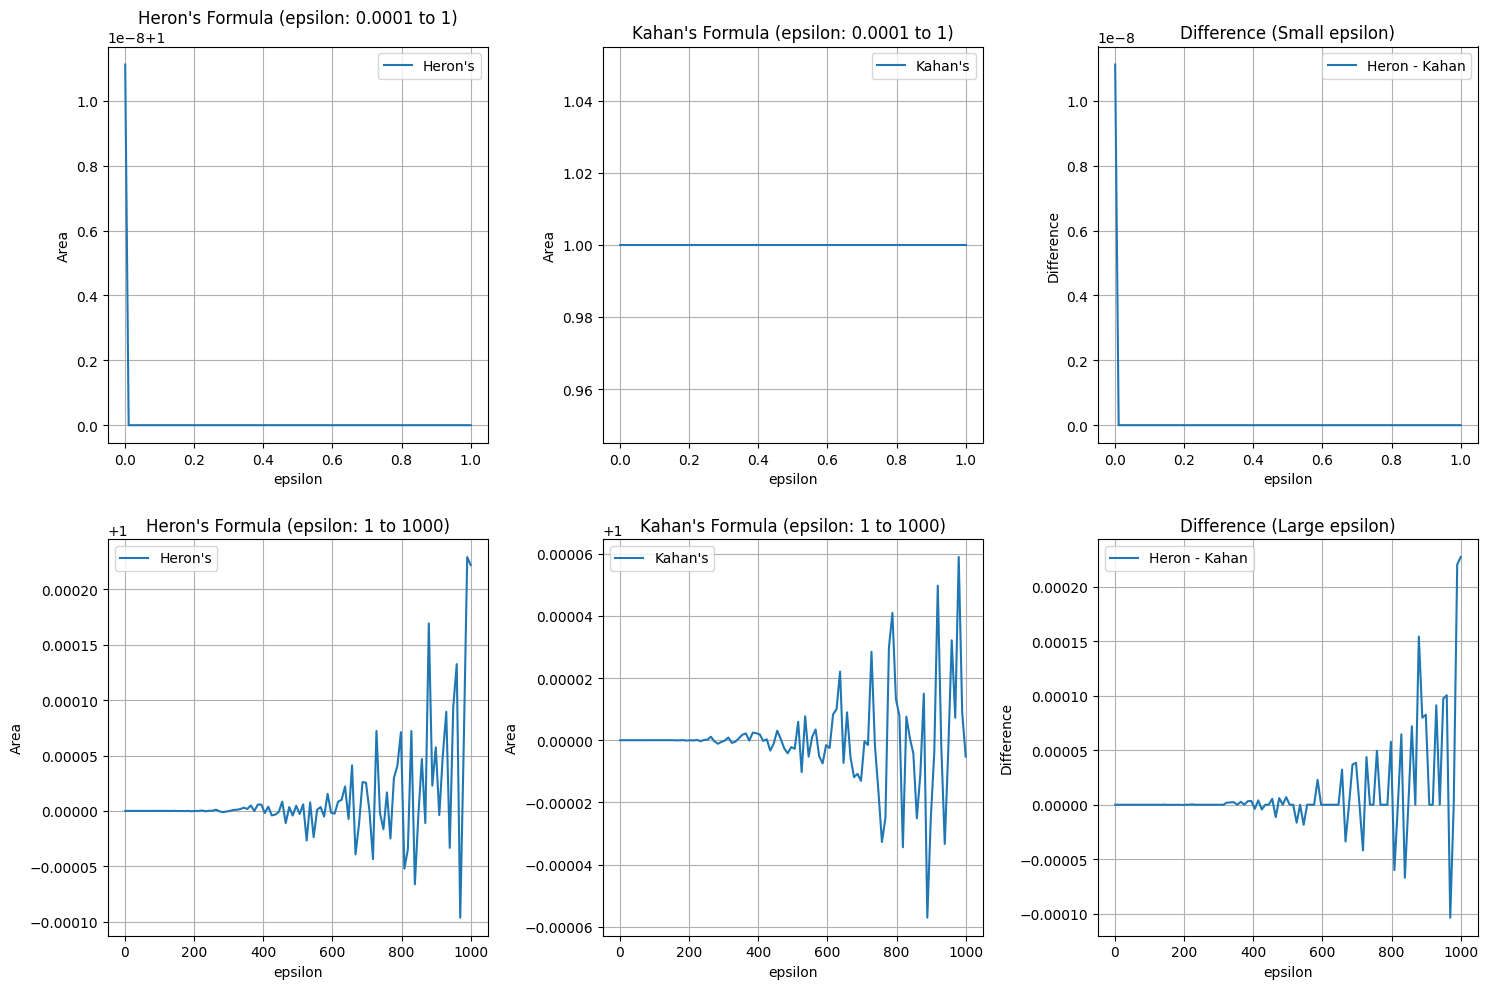

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def triangle_area_heron(a, b, c):
    # Compute the semi-perimeter and return the area using Heron's formula.
    s = ((a + b) + c) / 2
    return np.sqrt(s * (s - a) * (s - b) * (s - c))

def triangle_area_kahan(a, b, c):
    # Sort the sides in decreasing order using list.sort to ensure a >= b >= c.
    sides = [a, b, c]
    sides.sort(reverse=True)
    a, b, c = sides
    return (1/4) * np.sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c)))

# Generate epsilon values:
# For small epsilon, we exclude 0 by starting at 0.0001 and going to 1.
epsilon_small = np.linspace(0.0001, 1, 100)
# For large epsilon, we choose 100 evenly spaced values from 1 to 1000.
epsilon_large = np.linspace(1, 1000, 100)

# Compute areas for the small epsilon range.
areas_heron_small = []
areas_kahan_small = []
for eps in epsilon_small:
    a = 2 * eps
    b = c = np.sqrt(1 + eps**4) / eps
    areas_heron_small.append(triangle_area_heron(a, b, c))
    areas_kahan_small.append(triangle_area_kahan(a, b, c))
areas_heron_small = np.array(areas_heron_small)
areas_kahan_small = np.array(areas_kahan_small)
difference_small = areas_heron_small - areas_kahan_small

# Compute areas for the large epsilon range.
areas_heron_large = []
areas_kahan_large = []
for eps in epsilon_large:
    a = 2 * eps
    b = c = np.sqrt(1 + eps**4) / eps
    areas_heron_large.append(triangle_area_heron(a, b, c))
    areas_kahan_large.append(triangle_area_kahan(a, b, c))
areas_heron_large = np.array(areas_heron_large)
areas_kahan_large = np.array(areas_kahan_large)
difference_large = areas_heron_large - areas_kahan_large

# Create a figure with 2 rows and 3 columns for 6 subplots.
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Row 1: Small epsilon (0.0001 to 1)
axs[0, 0].plot(epsilon_small, areas_heron_small, label="Heron's")
axs[0, 0].set_xlabel('epsilon')
axs[0, 0].set_ylabel('Area')
axs[0, 0].set_title("Heron's Formula (epsilon: 0.0001 to 1)")
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].plot(epsilon_small, areas_kahan_small, label="Kahan's")
axs[0, 1].set_xlabel('epsilon')
axs[0, 1].set_ylabel('Area')
axs[0, 1].set_title("Kahan's Formula (epsilon: 0.0001 to 1)")
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[0, 2].plot(epsilon_small, difference_small, label="Heron - Kahan")
axs[0, 2].set_xlabel('epsilon')
axs[0, 2].set_ylabel('Difference')
axs[0, 2].set_title("Difference (Small epsilon)")
axs[0, 2].legend()
axs[0, 2].grid(True)

# Row 2: Large epsilon (1 to 1000)
axs[1, 0].plot(epsilon_large, areas_heron_large, label="Heron's")
axs[1, 0].set_xlabel('epsilon')
axs[1, 0].set_ylabel('Area')
axs[1, 0].set_title("Heron's Formula (epsilon: 1 to 1000)")
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].plot(epsilon_large, areas_kahan_large, label="Kahan's")
axs[1, 1].set_xlabel('epsilon')
axs[1, 1].set_ylabel('Area')
axs[1, 1].set_title("Kahan's Formula (epsilon: 1 to 1000)")
axs[1, 1].legend()
axs[1, 1].grid(True)

axs[1, 2].plot(epsilon_large, difference_large, label="Heron - Kahan")
axs[1, 2].set_xlabel('epsilon')
axs[1, 2].set_ylabel('Difference')
axs[1, 2].set_title("Difference (Large epsilon)")
axs[1, 2].legend()
axs[1, 2].grid(True)

plt.tight_layout()
plt.show()


## Discussion

We looked at the area of triangles with side lengths a = 2 epsilon and b = c = sqrt(1-epsilon^4)/epsilon and compared the results from Heron's and Kahan's formulas. For any epsilon values the triangle should have an area of 1. 
To see how well the two different formulas work we tested them across two ranges of epsilon values: one very small (0.0001 to 1) and one large (1 to 1000).
When epsilon is small, both formulas mostly match the true area of 1, but Heron’s formula can show slight deviations, while Kahan’s formula stays very close to 1. For large epsilon values both methods do well again,
but we still notice that Kahan’s formula handles extreme cases more smoothly as the deviation of the area from 1 remains much closer to 0 than the deviation in Herons formula. 
Our graphs show exactly this behavior: Heron’s results can waver a bit at the extremes, whereas Kahan’s are more stable. In short, if you need an accurate triangle area across a wide range of shapes, Kahan’s formula is the safer bet.


## Question 2: Numerical linear algebra

Consider the following sequence of length $2$ vectors,

$$x_0 = \left( \begin{array}{c} 1 \\ 1 \end{array} \right),$$
$$x_{n + 1} = A x_n \quad \text{for} ~ n \ge 0,$$

with

$$A = \left( \begin{array}{cc} 0 & 1 \\ 1 & 1 \end{array} \right).$$

**2.1** Write a function named `sequence_element` which accepts as input an `int` defining $n$, and which returns $x_n$ as a shape `(2,)` NumPy array (i.e. a vector) with integer scalar data type.

The function must have the form

```
def sequence_element(n):
    ...
    return x
```

**[2 marks]**

In [2]:
import numpy as np

def sequence_element(n):
    A = np.array([[0, 1], [1, 1]], dtype=float)
    x0 = np.array([1, 1], dtype=float)
    for _ in range(n):
        x0 = A.dot(x)
    return x0


**2.2** Perform numerical calculations to investigate

$$e_n = \frac{\left\| A x_n - \alpha x_n \right\|}{\left\| x_n \right\|},$$

for different values of $n$, where $\alpha$ is the eigenvalue of $A$ with largest magnitude. Here $\left\| \cdot \right\|$ denotes the Euclidean $2$-norm. Comment on the results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

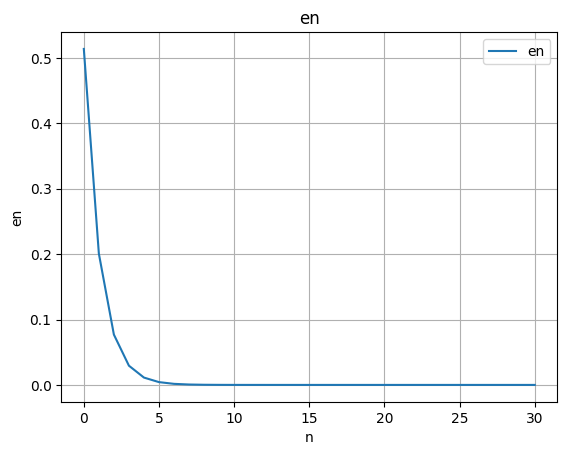

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sequence_element(n):
    A = np.array([[0, 1], [1, 1]], dtype=float)
    x0 = np.array([1, 1], dtype=float)
    for _ in range(n):
        x0 = A.dot(x0)
    return x0

# The dominant eigenvalue α of A
alpha = (1 + np.sqrt(5)) / 2

def en(n):
    # Compute the en
    x = sequence_element(n)
    A = np.array([[0, 1], [1, 1]], dtype=float)
    return np.linalg.norm(A.dot(x) - alpha * x) / np.linalg.norm(x)

# Evaluate the en for values of n
ns = np.arange(0, 31)
errors = np.array([en(n) for n in ns])

# Plot the en as a function of n.
plt.plot(ns, errors, label='en')
plt.xlabel('n')
plt.ylabel('en')
plt.title('en')
plt.grid(True)
plt.legend()
plt.show()

## Discussion

First we looked at the sequence x_n+1 = Ax_n with x0=[1,1] with its scalar product with A. With calculation we can find
that the dominant eigenvalue of A is alpha = (1+sqrt(5))/2, then we defined the error function e_n which measures how close x_n is to being 
an eigenvector for alpha, if e_n is small  then Ax_n is almost equal to alpha x_n thus signifying x_n is close to being an eigenvector for Ax_n
My code computes x_n using the function in the first part of the question and then calculates e_n using the error function above
from 0 to 30. The graph above clearly indicates that as n increases the error r_n drops rapidly, so x_n quickly becomes a suitable eigenvector 
for alpha.

## Question 3: Numerical integration

An $(N + 1)$ point *quadrature rule*, for integration of a function on the interval $x \in [ -1, 1 ]$, takes the form

$$\int_{-1}^1 f(x) dx \approx \sum_{i = 0}^N w_i f( x_i ),$$

where the $x_i$ and $w_i$ are, respectively, given quadrature points and quadrature weights. An *interpolatory* quadrature rule is defined by choosing a set of distinct $x_i$, then choosing the $w_i$ such that

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N w_i f( x_i ),$$

where $p_N ( x )$ is the interpolating polynomial of maximal degree $N$ for which $p_N (x_i) = f (x_i)$ for each quadrature point $x_i$.

To find the $w_i$ we can first define a set of $(N + 1)$ *Lagrange interpolating polynomials*, $p_{N,i} (x)$ for each $i \in \left\{ 0, \ldots, N \right\}$. Each of these is defined such that

$$p_{N,i} (x_j) = \delta_{i,j} = \begin{cases} 1 & \text{if} ~ i = j \\ 0 & \text{otherwise} \end{cases}.$$

We use this to re-express the interpolating polynomial

$$p_N (x) = \sum_{i = 0}^N p_{N,i} (x) f (x_i).$$

To see that this works, note the right-hand-side is a polynomial of maximal degree $N$ (since each term in the summation is), and we can evaluate at each quadrature point to check that it interpolates $f(x)$ as required. Hence

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N \left[ \int_{-1}^1 p_{N,i} (x) dx \right] f (x_i) = \sum_{i = 0}^N w_i f( x_i ),$$

and so the quadrature weights are

$$w_i = \int_{-1}^1 p_{N,i} (x) dx.$$

**3.1** Write a function `interpolatory_quadrature_weights` which takes in a shape `(N + 1,)` NumPy array with floating point scalar data type defining quadrature points $x_i$, and returns a shape `(N + 1,)` NumPy array containing corresponding values for the interpolatory quadrature rule quadrature weights.

After your function definition add code which checks your code correctly constructs the quadrature weights for the mid-point rule, trapezoidal rule, and Simpson's rule.

The function must have the form

```
def interpolatory_quadrature_weights(x):
    ...
    return w
```

**[5 marks]**

In [ ]:
import numpy as np

def interpolatory_quadrature_weights(x):
    N = len(x)
    if N == 1:
        return np.array([2.])
    
    w = [0.0] * N
    for i in range(N):
        mask = [j for j in range(N) if j != i]
        poly_num = np.poly(x[mask])
        denom = 1.0
        for j in mask:
            denom *= (x[i] - x[j])
        poly_int = np.polyint(poly_num / denom)
        w[i] = np.polyval(poly_int, 1) - np.polyval(poly_int, -1)
    return np.array(w)

# Midpoint rule (1-point quadrature) on [-1,1]:
x_mid = np.array([0.0])
if len(x_mid) == 1:
    w_mid = np.array([2.])
else:
    w_mid = interpolatory_quadrature_weights(x_mid)
print("Midpoint rule weights:", w_mid)  

# Trapezoidal rule (2-point quadrature) on [-1,1]:
x_trap = np.array([-1.0, 1.0])
w_trap = interpolatory_quadrature_weights(x_trap)
print("Trapezoidal rule weights:", w_trap)  

# Simpson's rule (3-point quadrature) on [-1,1]:
x_simp = np.array([-1.0, 0.0, 1.0])
w_simp = interpolatory_quadrature_weights(x_simp)
print("Simpson's rule weights:", w_simp) 


Midpoint rule weights: [2.]
Trapezoidal rule weights: [1. 1.]
Simpson's rule weights: [0.33333333 1.33333333 0.33333333]


**3.2** For a given positive integer $N$ consider two sets of quadrature points

$$x_{0,i} = -1 + \frac{2 i}{N},$$

and

$$x_{1,i} = -\cos \left( \frac{i \pi}{N} \right),$$

each defined for $i \in \left\{ 0, \ldots, N \right\}$. We can use these to define two different sets of interpolatory quadrature rules.

Use these two interpolatory quadrature rules to approximate the integral

$$\int_{-1}^1 f (x) dx,$$

with

$$f(x) = \frac{1}{1 + (3 x)^2}.$$

Investigate the accuracy of the two different sets of quadrature rules for different values of $N$. Summarize your results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[10 marks]**

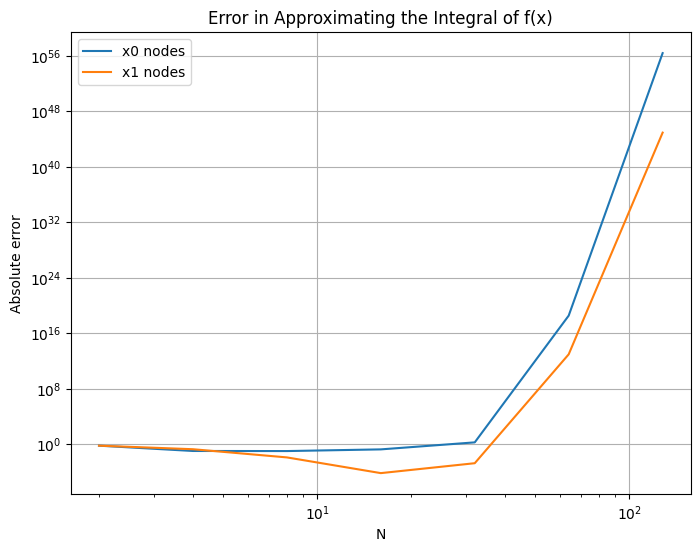

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def interpolatory_quadrature_weights(x):
    N = len(x)
    if N == 1:
        return np.array([2.])
    
    w = [0.0] * N
    for i in range(N):
        mask = [j for j in range(N) if j != i]
        poly_num = np.poly(x[mask])
        denom = 1.0
        for j in mask:
            denom *= (x[i] - x[j])
        poly_int = np.polyint(poly_num / denom)
        w[i] = np.polyval(poly_int, 1) - np.polyval(poly_int, -1)
    return np.array(w)

def f(x):
    return 1 / (1 + (3*x)**2)

# Exact integral value.
I_exact = (2/3) * np.arctan(3)

N_values = [2, 4, 8, 16, 32, 64, 128]
errors_x0 = []  # for x0 nodes
errors_x1 = []  # for x1 nodes

for N in N_values:
    # x0
    x0 = -1 + 2 * np.arange(N+1) / N
    w0 = interpolatory_quadrature_weights(x0)
    I0 = np.sum(w0 * f(x0))
    errors_x0.append(abs(I0 - I_exact))
    
    # x1
    i_ar = np.arange(N+1)
    x1 = -np.cos(i_ar * np.pi / N)
    w1 = interpolatory_quadrature_weights(x1)
    I1 = np.sum(w1 * f(x1))
    errors_x1.append(abs(I1 - I_exact))

# Plotting the errors versus N.
plt.figure(figsize=(8,6))
plt.loglog(N_values, errors_x0, label='x0 nodes')
plt.loglog(N_values, errors_x1, label='x1 nodes')
plt.xlabel('N')
plt.ylabel('Absolute error')
plt.title('Error in Approximating the Integral of f(x)')
plt.legend()
plt.grid(True)
plt.show()

## Discussion

We approximated the integral using interpolatory quadrature rules defined by two sets of nodes x0 and x1.
For each set, we computed the quadrature weights using our function, and then approximated I. the exact value of I can be found
as 2/3*arctan(3). We then varied N (using 2, 4, 8, …, 128) and computed the absolute error of each rule. The plot (on a log scale) shows that the error decreases with increasing N. As we can see, the x1 nodes yield a smaller error than the x0 nodes for each N.
In summary, both quadrature rules converge to the exact value, but the x1 rule performs better.
